##WallMart Capstone Project##

>







**Problem Statement:**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

Link to Dataset: https://drive.google.com/file/d/1iBfF9LjmcOtzkNYFCcr5hb3PHTTGXnHd/view?usp=sharing

**Step 1:**
***Import the necessary libraries***



In [ ]:
#configuration Libraries

import warnings
warnings.filterwarnings('ignore')

#Data Libraries

import pandas as pd
import numpy as np

#Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Libraries

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


***Machine Learning Libraries***

In [ ]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

**Step: 2 Data Loading and Data Inspection**

In [ ]:
df= pd.read_csv('/content/Walmart DataSet.csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Change the datatype:**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

<Axes: xlabel='Holiday_Flag', ylabel='count'>

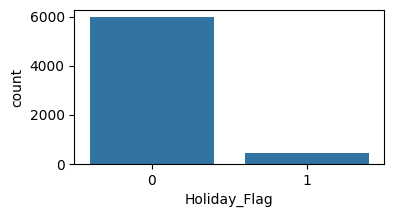

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(x='Holiday_Flag', data=df)

**Step 3: Statistical Analysis**

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


hist plot for Weekly Sales

<function matplotlib.pyplot.show(close=None, block=None)>

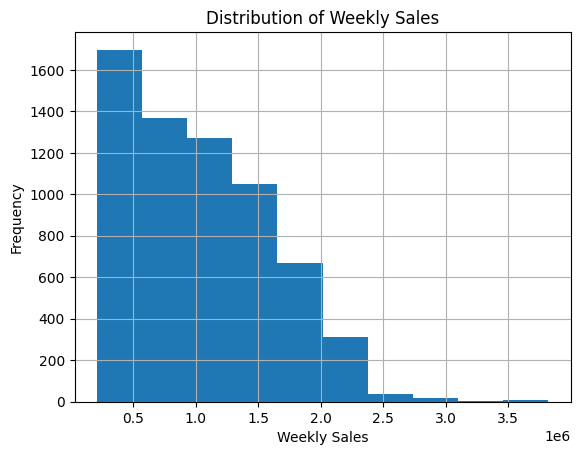

In [ ]:
df['Weekly_Sales'].hist()
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

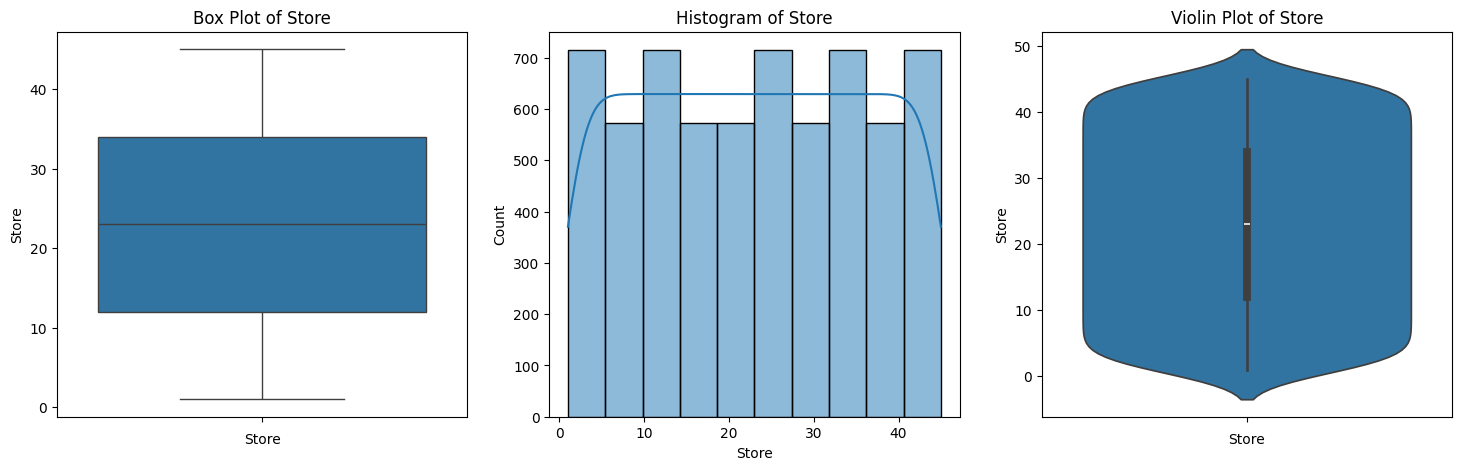

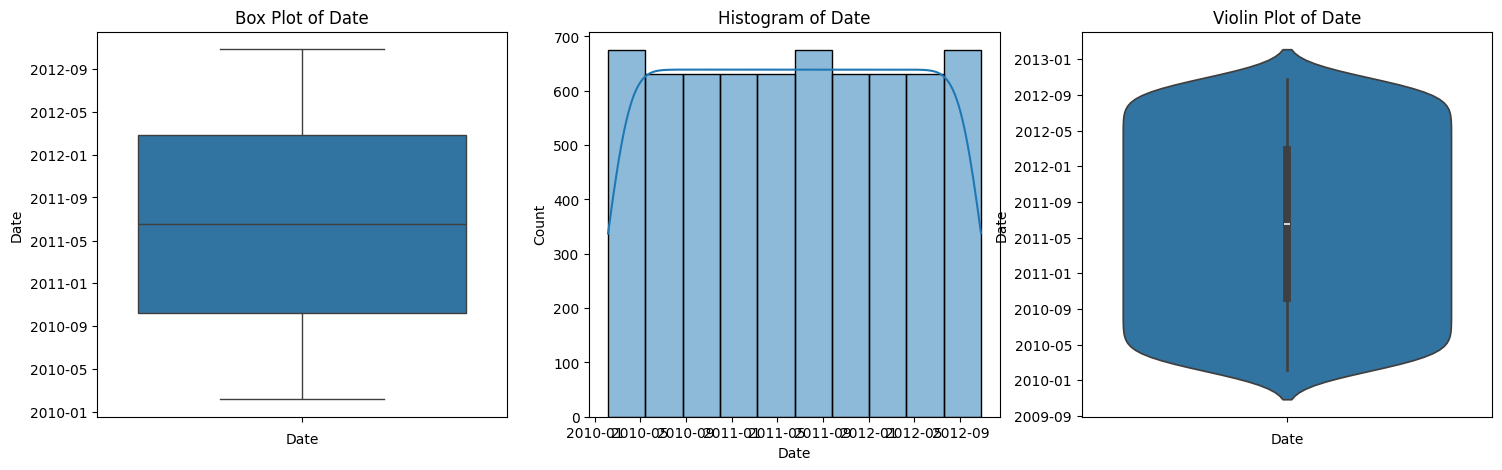

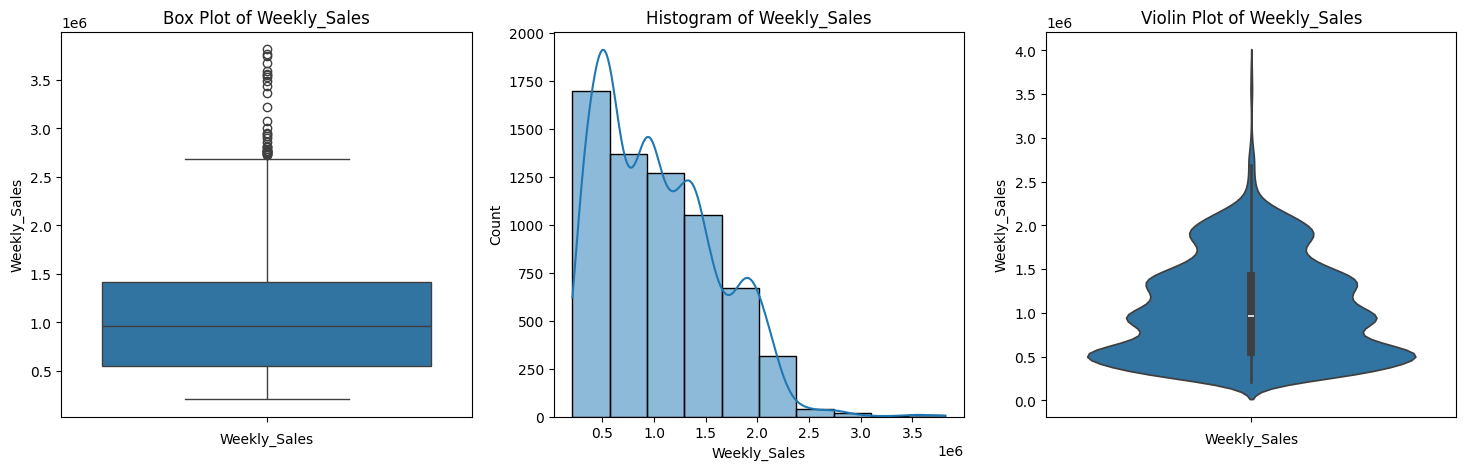

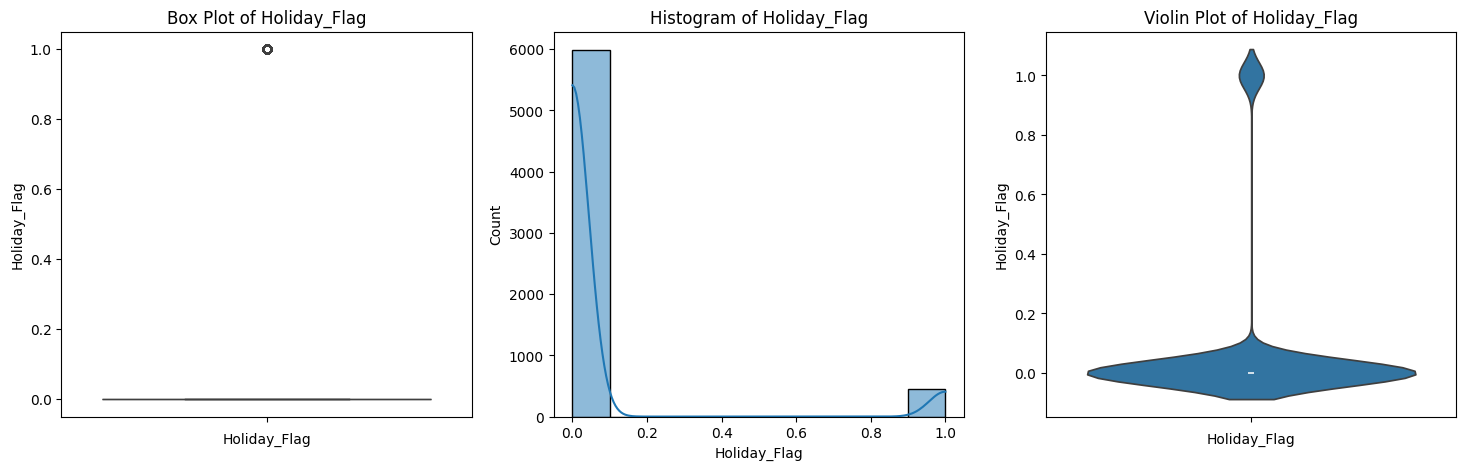

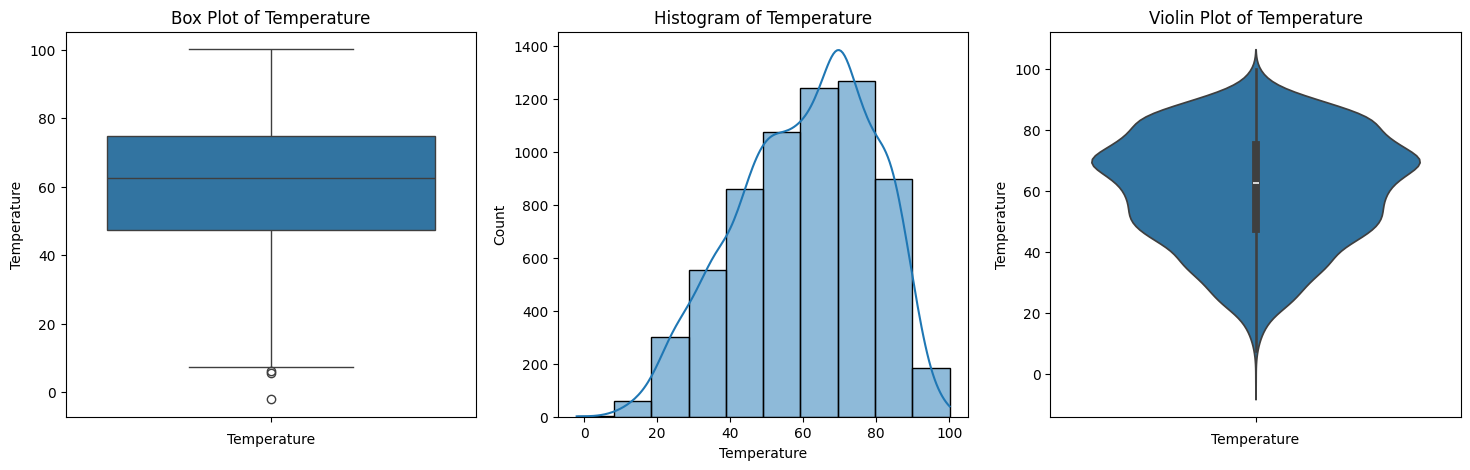

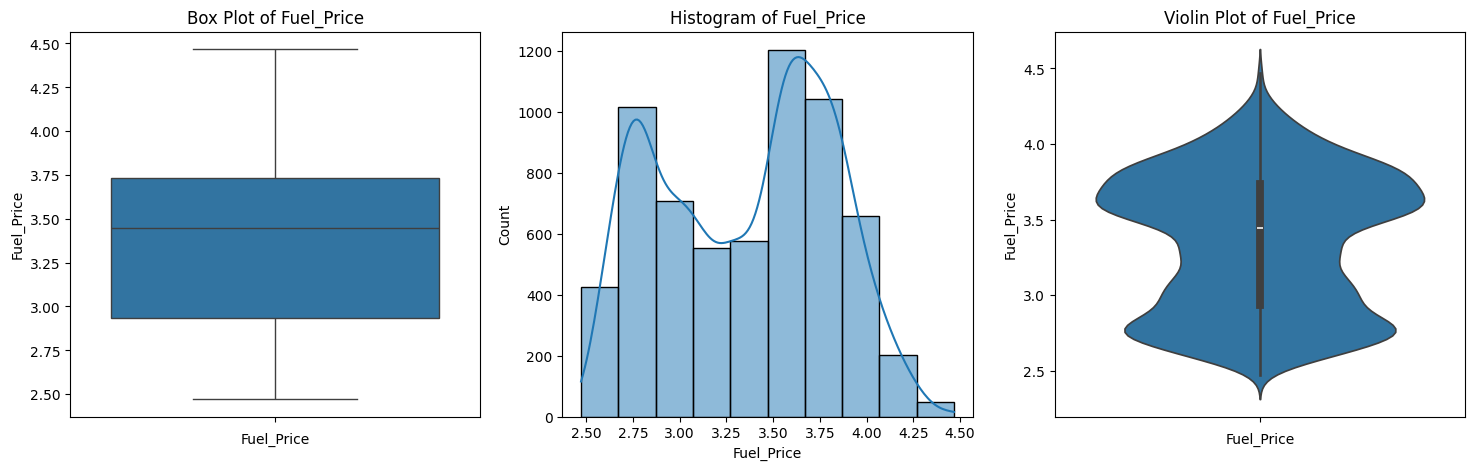

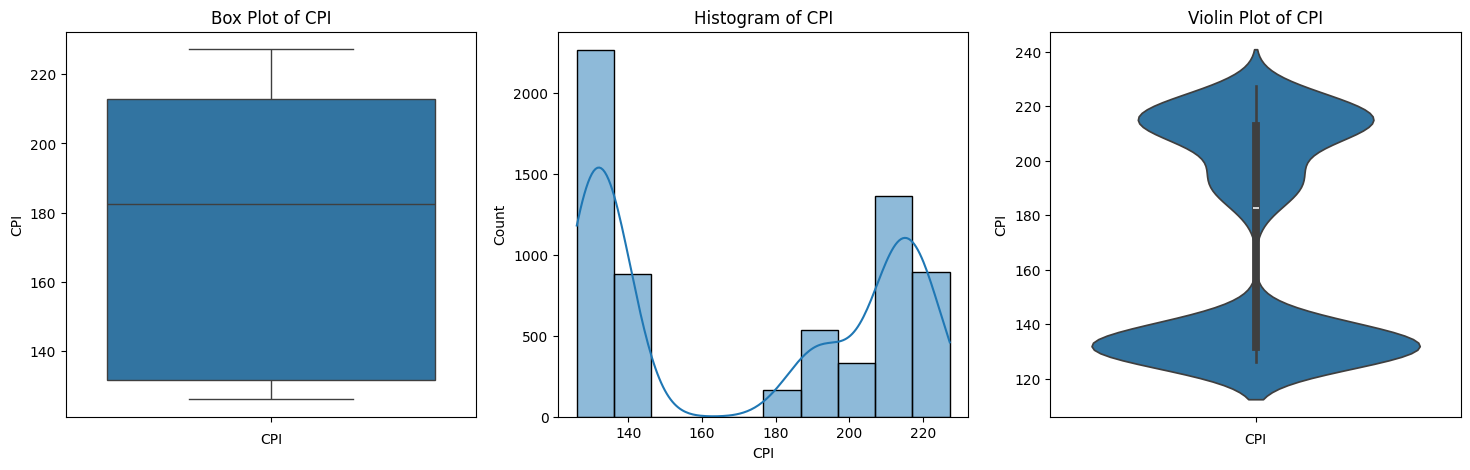

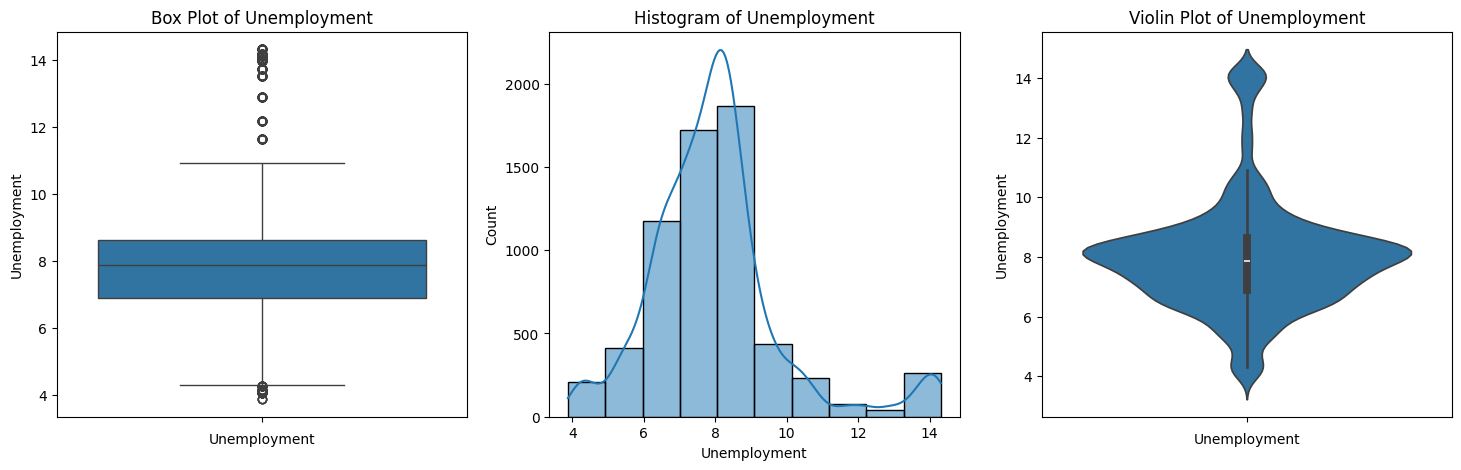

In [ ]:
# Grabbing all the columns from the dataset
col_list = df.columns
for x in col_list:
  # Create a figure with three subplots arranged in one row
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  # Box plot
  sns.boxplot(y=df[x], ax=axes[0])
  axes[0].set_title(f'Box Plot of {x}')
  axes[0].set_xlabel(x)

  # Histogram with KDE
  sns.histplot(df[x], kde=True, bins=10, ax=axes[1])
  axes[1].set_title(f'Histogram of {x}')
  axes[1].set_xlabel(x)

  # Violin plot
  sns.violinplot(y=df[x], ax=axes[2])
  axes[2].set_title(f'Violin Plot of {x}')
  axes[2].set_xlabel(x)

Outliers are detected in 'Temperature','Unemployment', 'Weekly_Sales'. So, we are removing the outliers using IQR treatment.

In [ ]:
outlier_list=['Temperature','Unemployment', 'Weekly_Sales']

In [ ]:
for x in outlier_list:
  # Quantiles
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  # Inter Quartile Ranging
  IQR = Q3 - Q1

  # Uppper Bound and Lower Bound
  UB = Q3 + (1.5 * IQR)
  LB = Q1 - (1.5 * IQR)

  #We need to eliminate all the data points that are beyond these bounds
  df = df[(df[x]>=LB) & (df[x]<=UB)]

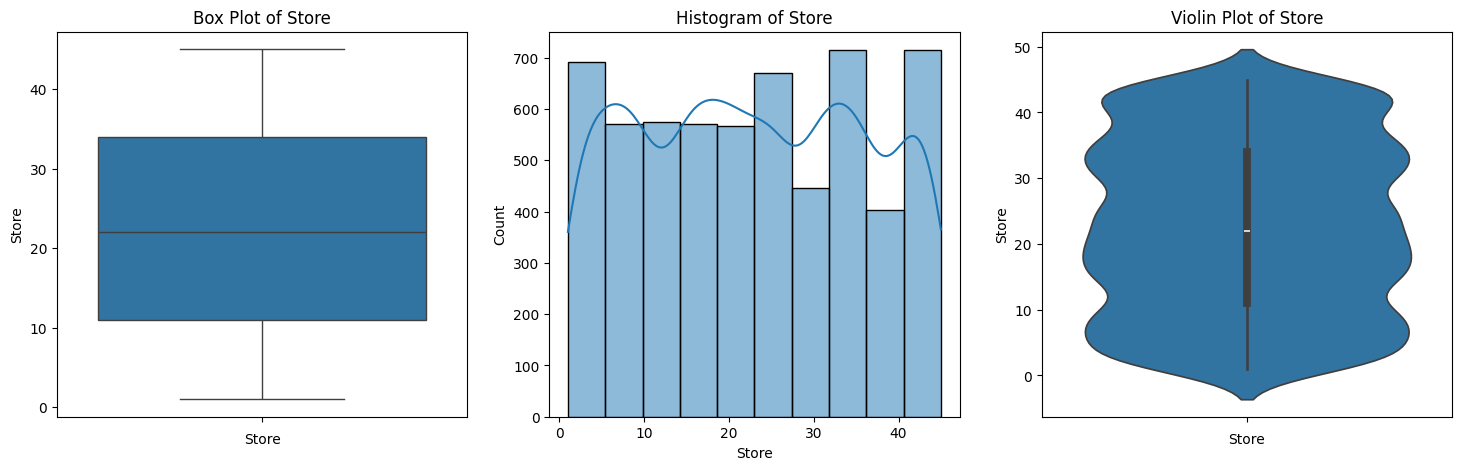

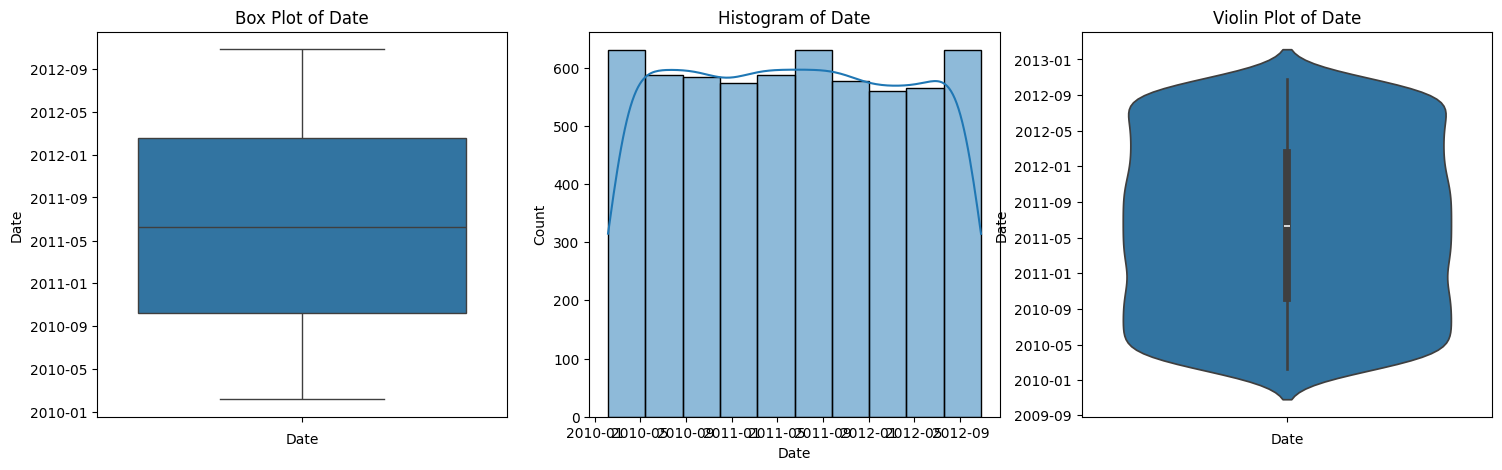

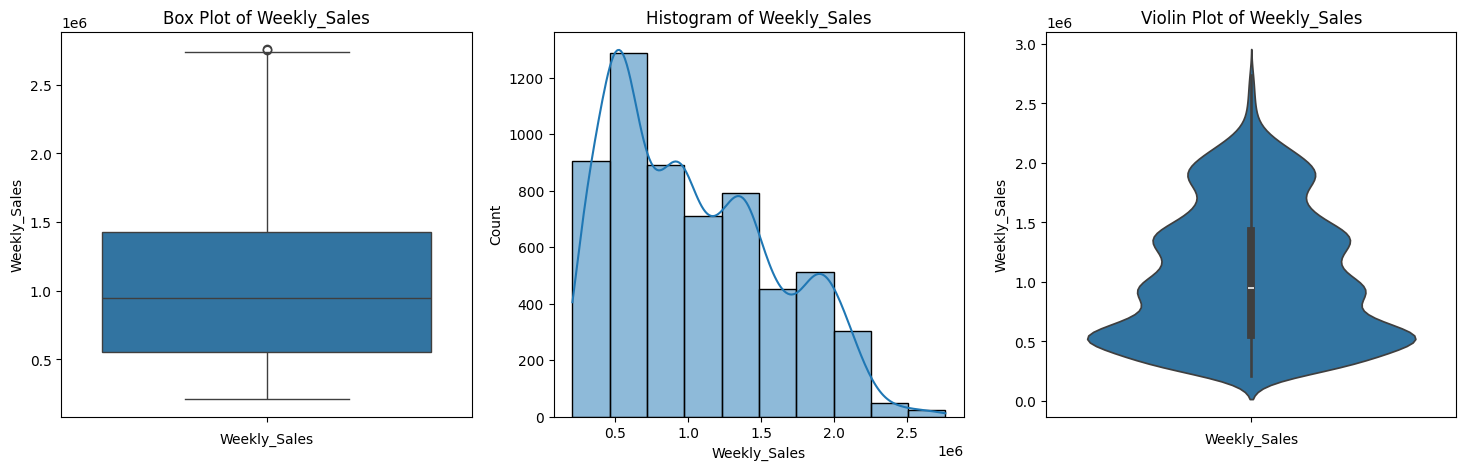

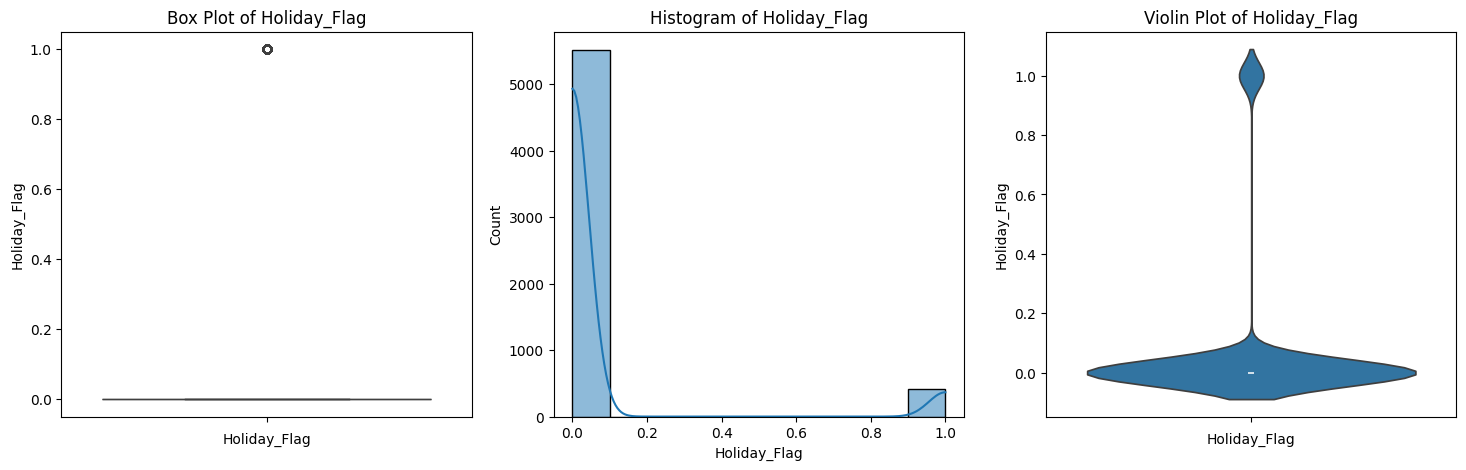

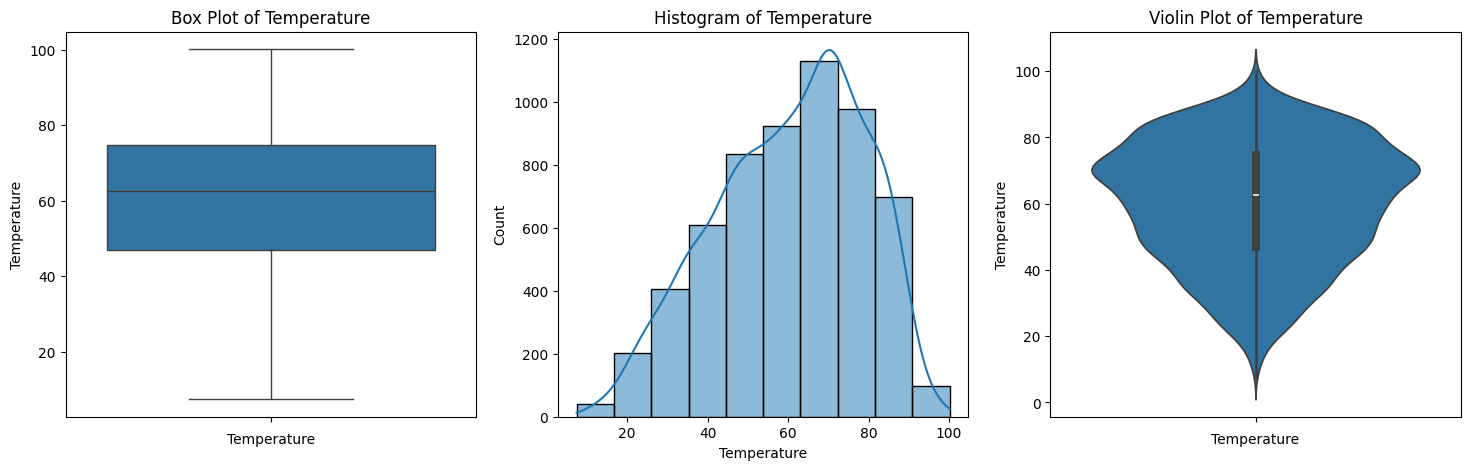

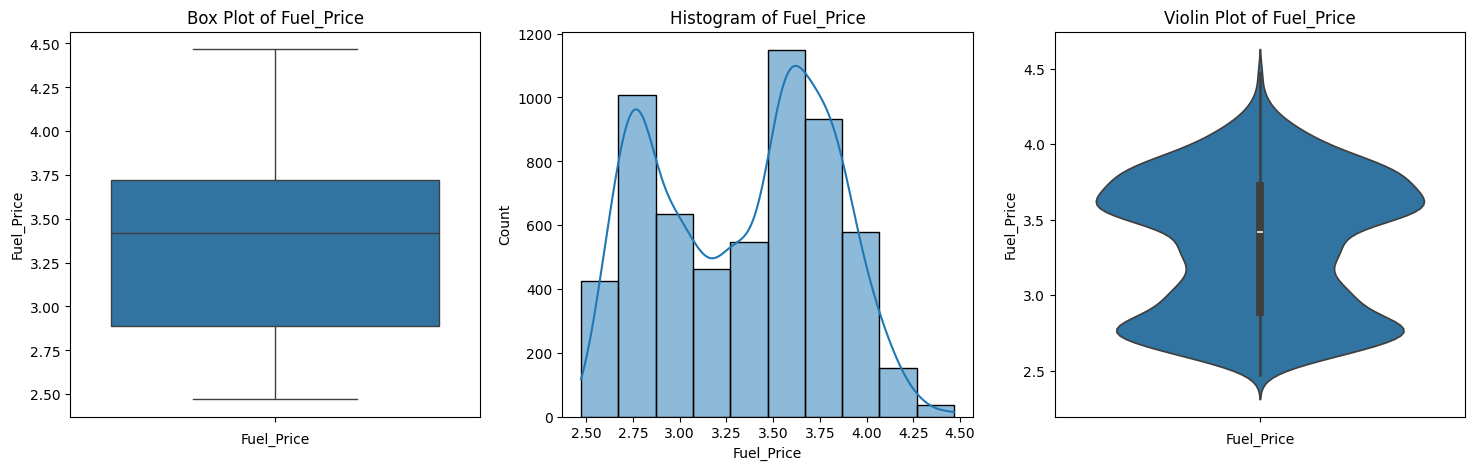

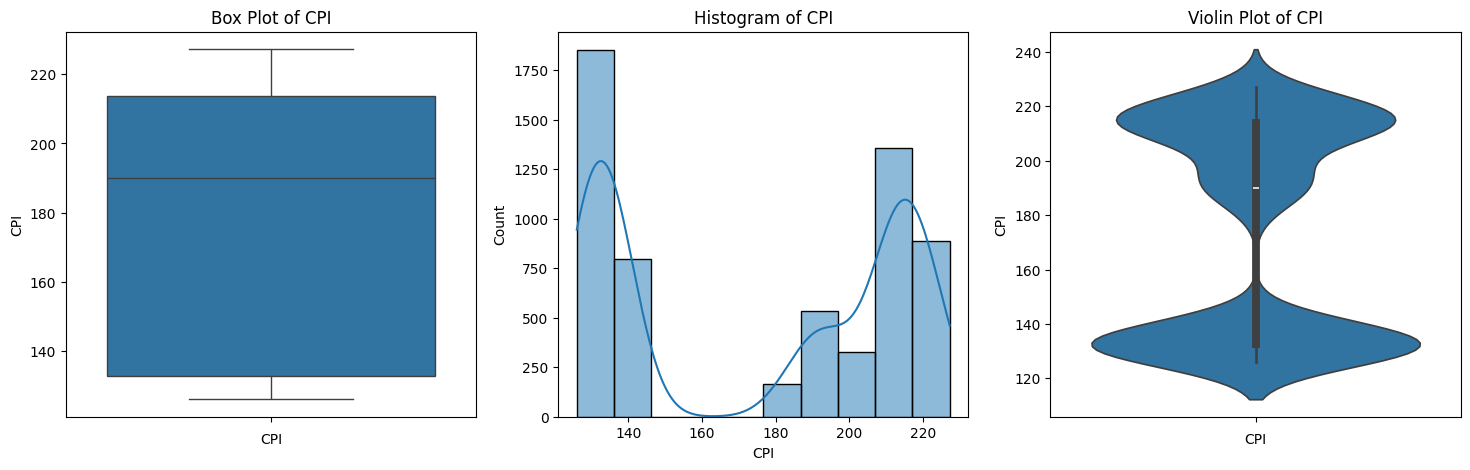

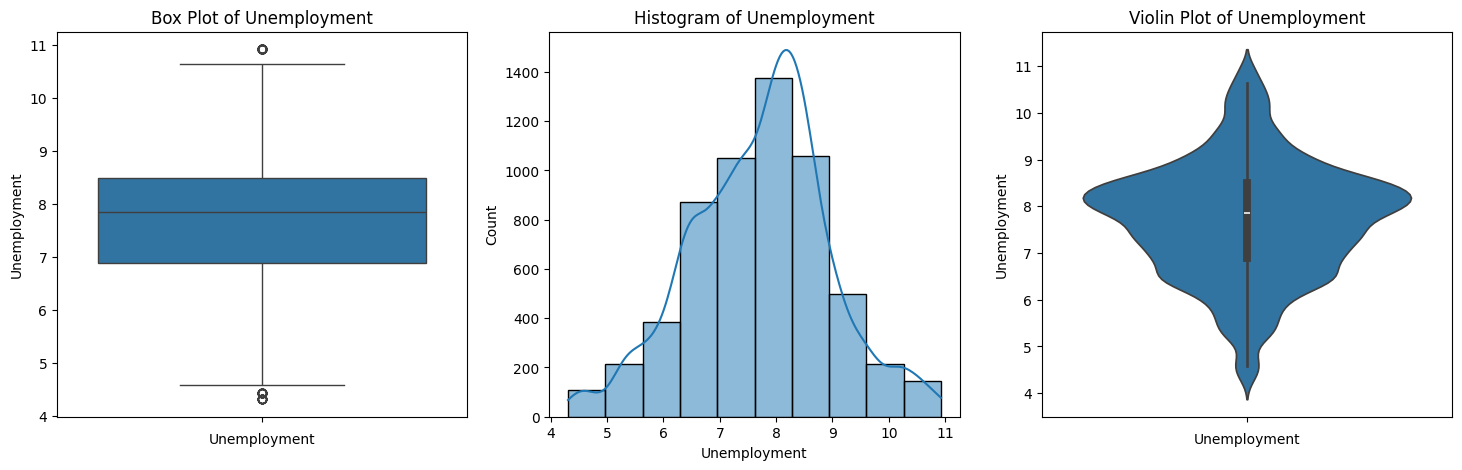

In [ ]:
# Grabbing all the columns from the dataset
col_list = df.columns
for x in col_list:
  # Create a figure with three subplots arranged in one row
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  # Box plot
  sns.boxplot(y=df[x], ax=axes[0])
  axes[0].set_title(f'Box Plot of {x}')
  axes[0].set_xlabel(x)

  # Histogram with KDE
  sns.histplot(df[x], kde=True, bins=10, ax=axes[1])
  axes[1].set_title(f'Histogram of {x}')
  axes[1].set_xlabel(x)

  # Violin plot
  sns.violinplot(y=df[x], ax=axes[2])
  axes[2].set_title(f'Violin Plot of {x}')
  axes[2].set_xlabel(x)

**Exploratory Data Analysis:**

<Axes: >

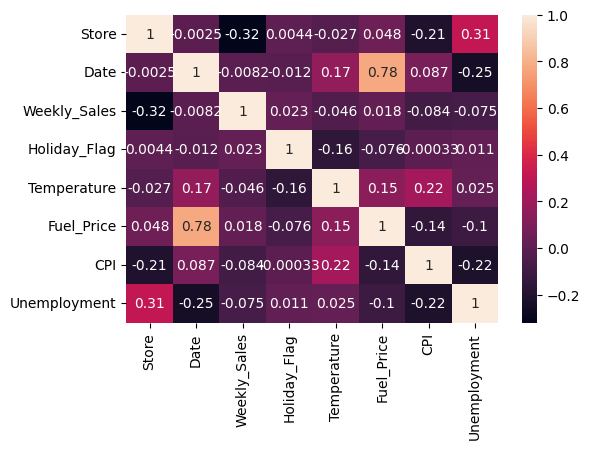

In [ ]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr(), annot=True)

In [ ]:
store_correlations = df.groupby('Store').apply(
    lambda group: group['Weekly_Sales'].corr(group['Unemployment'])
)

In [ ]:
store_correlations.sort_values(ascending=False)

Store
36    0.833734
35    0.483865
14    0.269510
21    0.218367
30    0.201862
10    0.186979
18    0.139179
19    0.101464
33    0.101175
29    0.084682
15    0.078905
2     0.054288
6     0.044251
22    0.039043
34    0.017010
12    0.015141
45   -0.004041
25   -0.004958
24   -0.012261
11   -0.020339
27   -0.021116
8    -0.052580
31   -0.064738
28   -0.066340
26   -0.066556
38   -0.069747
16   -0.070864
20   -0.090910
1    -0.097955
32   -0.099455
7    -0.165131
23   -0.178507
9    -0.191534
43   -0.201954
5    -0.207043
40   -0.213724
37   -0.221287
3    -0.230413
17   -0.279019
41   -0.350630
42   -0.356355
13   -0.380434
39   -0.384681
4    -0.560534
44   -0.780076
dtype: float64

Text(0.5, 1.0, 'Correlation between Weekly Sales and Unemployment by Store')

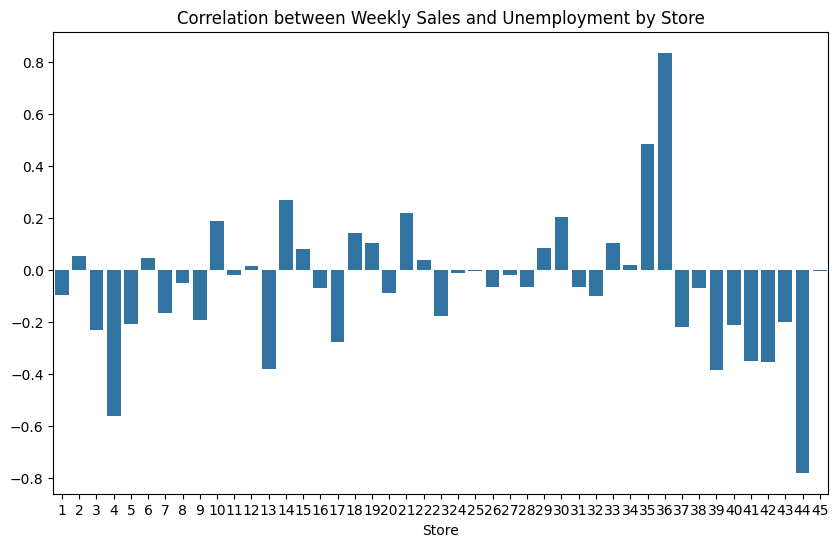

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=store_correlations.index, y=store_correlations.values)
plt.title('Correlation between Weekly Sales and Unemployment by Store')

**Interpretation:**
* The stores where the correlation between Weekly_Sales and Unemployment is most negative.
* A strong negative correlation indicates that higher unemployment is associated with lower sales.

**From the correlation between Weekly_Sales and Unemployment, we can clearly see that store 44 is affected the most.**

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

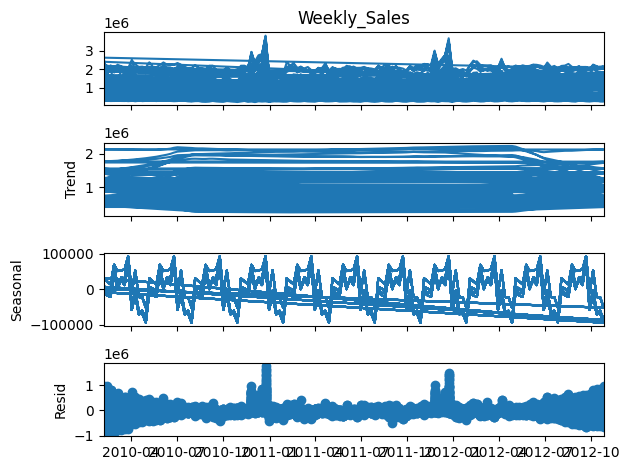

In [ ]:
# Seasonal Trend Analysis
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)
result.plot()
plt.show()

3. Does temperature affect the weekly sales in any manner?

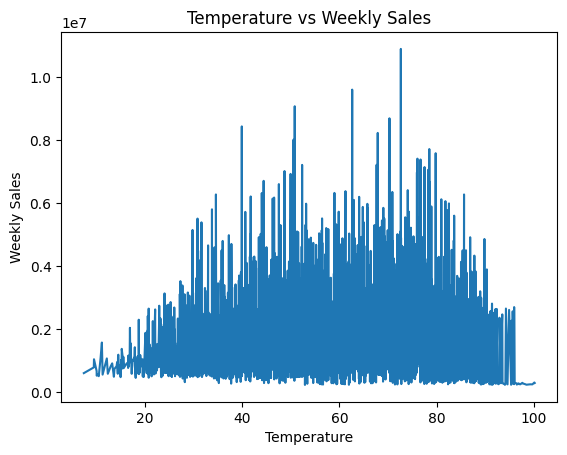

In [ ]:
df.groupby('Temperature')['Weekly_Sales'].sum().plot()
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()